In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
# loading data to a data frame
df = pd.read_csv('data.csv') 
df.columns

Index(['Id', 'y', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6',
       'T1_V7', 'T1_V8', 'T1_V9', 'T1_V10', 'T1_V11', 'T1_V12', 'T1_V13',
       'T1_V14', 'T1_V15', 'T1_V16', 'T1_V17', 'T2_V1', 'T2_V2', 'T2_V3',
       'T2_V4', 'T2_V5', 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9', 'T2_V10',
       'T2_V11', 'T2_V12', 'T2_V13', 'T2_V14', 'T2_V15'],
      dtype='object')

In [3]:
df.shape

(50999, 34)

## Features exploration

In [4]:
df[:5]

,Id,y,T1_V1,T1_V2,T1_V3,T1_V4,T1_V5,T1_V6,T1_V7,T1_V8,...,T2_V6,T2_V7,T2_V8,T2_V9,T2_V10,T2_V11,T2_V12,T2_V13,T2_V14,T2_V15
0,1,1,15,3,2,N,B,N,B,B,...,2,37,1,11,6,Y,N,E,2,2
1,2,4,16,14,5,H,B,N,B,B,...,2,22,1,18,5,Y,Y,E,2,1
2,3,1,10,10,5,N,K,N,B,B,...,6,37,2,14,6,Y,Y,E,6,1
3,4,1,18,18,5,N,K,N,B,B,...,2,25,1,1,6,Y,N,C,2,6
4,5,1,13,19,5,N,H,N,B,B,...,1,22,1,2,7,N,N,E,1,1


unique values: 50
Some values [41, 42, 44, 46, 49, 51, 52, 63, 64, 69]
All int ? True


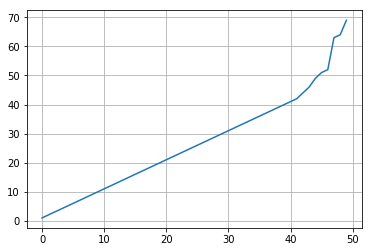

In [5]:
uniq_y_values = sorted(list(df['y'].unique()))
print ("unique values: {}".format(len(uniq_y_values)))
print ("Some values {}".format(uniq_y_values[-10:]))
plt.plot(uniq_y_values) 
plt.grid(True)
all_int = all([int(x) == x for x in uniq_y_values])
print ("All int ? {}".format(all_int))

Looking only at the the number and the type of the outputs (we can consider/justify) the problem as classification problem with 50 targets classes. However because of the missing values (of classes IDs) it is more likely to be a regression problem, (or something in between an ordinal regression problem). (as an answer/to my question It is a kind of  count of events)

In [6]:
from collections import Counter
def ft_infos(ft, verbose=False):
    c = Counter()
    c.update(df[ft].values)
    if verbose:
        print(c)
    plt.figure(figsize=(10,2))
    ax = plt.axes([0, 0, 1, 1])
    to_plot = list(zip(*sorted([(value, count) for value, count in c.items()], key= lambda x:x[0])))
    plt.bar(to_plot[0], to_plot[1], label=ft)
    plt.legend()
    plt.grid(True)
    return c

Counter({1: 18981, 4: 8273, 2: 6145, 5: 3645, 7: 3284, 3: 2025, 8: 1783, 6: 1407, 10: 1311, 11: 800, 9: 739, 13: 560, 14: 389, 12: 379, 16: 235, 17: 194, 15: 174, 19: 138, 18: 103, 20: 98, 22: 71, 25: 44, 23: 42, 28: 32, 21: 31, 26: 25, 29: 14, 24: 14, 30: 9, 31: 8, 34: 8, 32: 6, 27: 5, 42: 4, 37: 2, 38: 2, 41: 2, 36: 2, 46: 2, 40: 2, 35: 2, 33: 1, 51: 1, 69: 1, 44: 1, 39: 1, 49: 1, 52: 1, 63: 1, 64: 1})


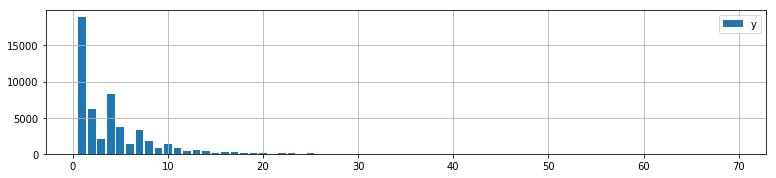

In [7]:
ys = ft_infos('y', verbose=True)

Clearly the data is not balanced !

In [8]:
# predicting by default 1 as the score or class will have 
baseline_acc = ys[1]/df.shape[0] # of accuracy
print(baseline_acc)

0.37218376830918254


In [9]:
for column in df.columns[1:]: # to avoid the Id 
    unique_values = df[column].unique()
    print("feature: {}, |uniq val|: {}, uniq values: {}".format(column, len(unique_values), sorted(unique_values)))

feature: y, |uniq val|: 50, uniq values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 46, 49, 51, 52, 63, 64, 69]
feature: T1_V1, |uniq val|: 19, uniq values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
feature: T1_V2, |uniq val|: 24, uniq values: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
feature: T1_V3, |uniq val|: 9, uniq values: [1, 2, 3, 4, 5, 6, 7, 8, 9]
feature: T1_V4, |uniq val|: 8, uniq values: ['B', 'C', 'E', 'G', 'H', 'N', 'S', 'W']
feature: T1_V5, |uniq val|: 10, uniq values: ['A', 'B', 'C', 'D', 'E', 'H', 'I', 'J', 'K', 'L']
feature: T1_V6, |uniq val|: 2, uniq values: ['N', 'Y']
feature: T1_V7, |uniq val|: 4, uniq values: ['A', 'B', 'C', 'D']
feature: T1_V8, |uniq val|: 4, uniq values: ['A', 'B', 'C', 'D']
feature: T1_V9, |uniq val|: 6, uniq values: ['B', 'C', 'D', 'E', 'F', 'G']
feature:

### Numerical features

In [10]:
# Some plotting function (for visualizing features)
def plot_features(data, features, pl_limit=100, plot_target=True):
    plt.figure(figsize=(10,2))
    ax = plt.axes([0, 0, 1, 1])
    if plot_target:
        plt.plot(data['y'][:pl_limit], label='target')
    for ft in features:
        plt.plot(data[ft][:pl_limit], label=ft)
    plt.legend()
    plt.grid(True)

def plot_target_f_ft(data, ft, target='y', pl_limit=100):
    """ plot target = function(features)"""
    plt.figure(figsize=(10,2))
    ax = plt.axes([0, 0, 1, 1])
    plt.scatter(data[ft][:pl_limit], data[target][:pl_limit], label=ft)
    plt.legend()
    plt.grid(True)

We can think about adding T1_V3, T2_V6, T2_V8, T2_V10 and T2_V14 to the dummy features
because of the roughly few unique values they can take. 

For now we keep considering them numerical (no enough insights), 
probably the T2_V10, T2_V14, T2_V6, (could be week day related ...)


In [11]:
numerical_fts = ['T1_V1', 'T1_V2', 'T1_V3', 'T2_V1', 'T2_V2', 'T2_V4', 
                 'T2_V6', 'T2_V7', 'T2_V8', 'T2_V9',
                 'T2_V10', 'T2_V14', 'T2_V15']

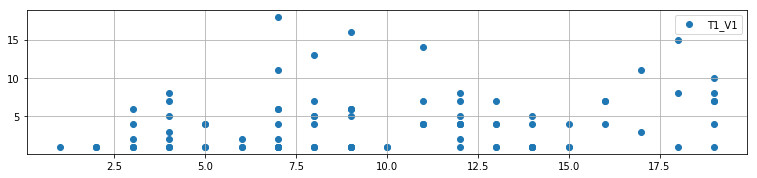

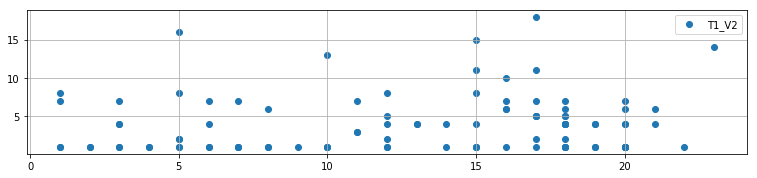

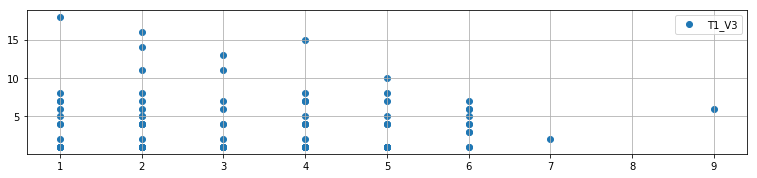

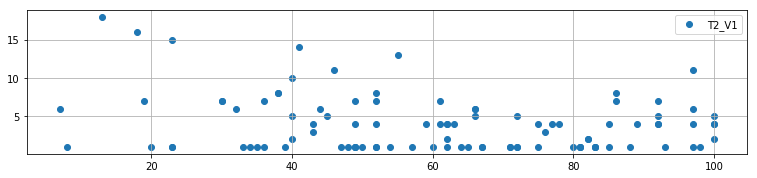

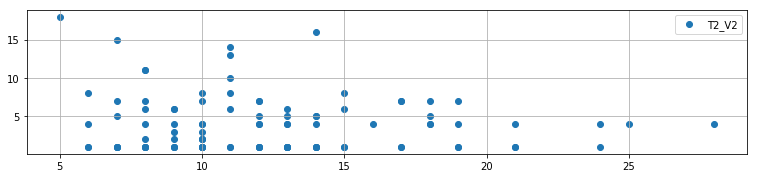

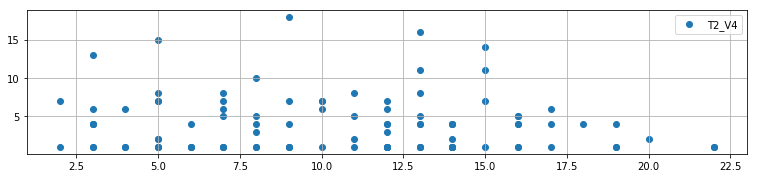

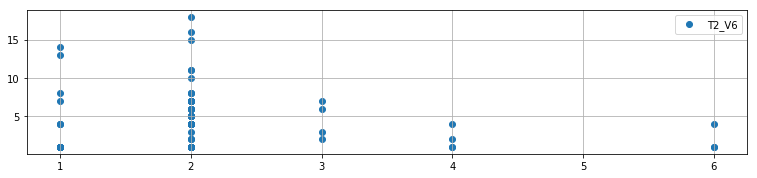

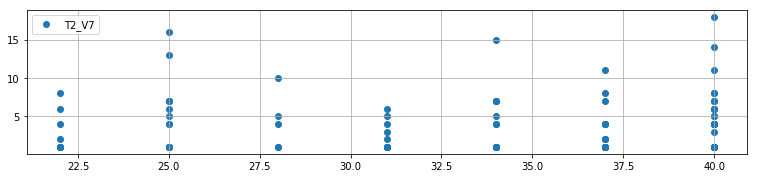

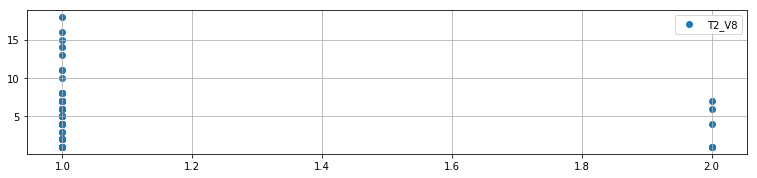

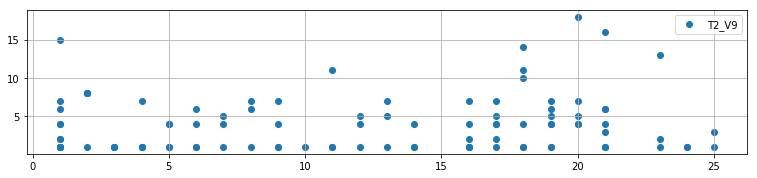

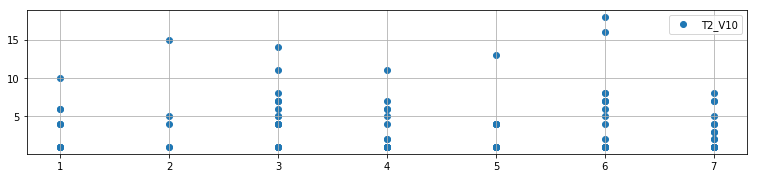

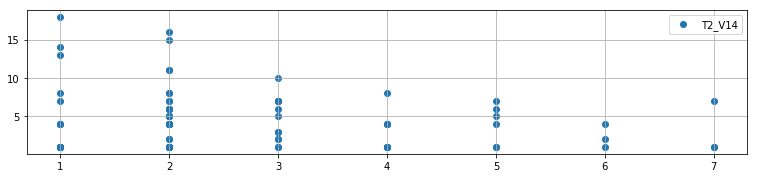

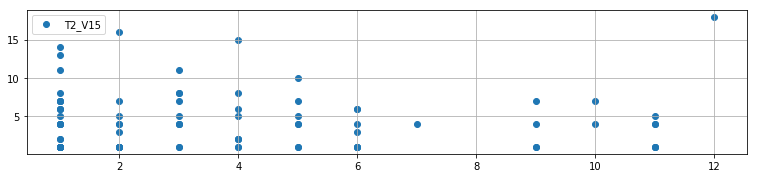

In [12]:
for ft in numerical_fts:
    # ft_infos(ft)
    plot_target_f_ft(df, ft)

In [13]:
# Considering all the features as dummies (exp.)
all_dummy_fts = []
for dummy in numerical_fts:
    dummies = pd.get_dummies(df[dummy], prefix=dummy, drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    all_dummy_fts.extend(dummies)

### Dummy features (one hot)

In [14]:
# Boolean features (the 'Yes', 'No')
boolean_src_fts = [column for column in df.columns if set(df[column].unique()) == set(['Y' , 'N'])]
print(" {} (Y,N) features {}".format(len(boolean_src_fts), boolean_src_fts))

 5 (Y,N) features ['T1_V6', 'T1_V17', 'T2_V3', 'T2_V11', 'T2_V12']


In [15]:
# They might be more than these (here we consider only the Letter values as categorical), 
# Since some of the numerical features seems to be more categorical like T1_V3, T2_V6, T2_V8 and T2_V10, T2_V14 
# let's collect them in a lazy way :)

import string
print(df.columns)
ascii_uppercase = set(string.ascii_uppercase)
dummy_src_fts = list(set([column for column in df.columns if set(df[column].unique()).
                          issubset(ascii_uppercase)]).difference(set(boolean_src_fts)))
# dummy_src_fts.extend(['T1_V3', 'T2_V6', 'T2_V8', 'T2_V10', 'T2_V14'])

Index(['Id', 'y', 'T1_V1', 'T1_V2', 'T1_V3', 'T1_V4', 'T1_V5', 'T1_V6',
       'T1_V7', 'T1_V8',
       ...
       'T2_V15_3', 'T2_V15_4', 'T2_V15_5', 'T2_V15_6', 'T2_V15_7', 'T2_V15_8',
       'T2_V15_9', 'T2_V15_10', 'T2_V15_11', 'T2_V15_12'],
      dtype='object', length=315)


In [16]:
dummy_fts = []

# Dummy columns mainly boolean features
for dummy in dummy_src_fts:
    dummies = pd.get_dummies(df[dummy], prefix=dummy, drop_first=False)
    df = pd.concat([df, dummies], axis=1)
    dummy_fts.extend(dummies)

# Boolean features (we do not also drop first for high order features generation)
# this redundancy will be ignored for tree models

boolean_fts = []

for dummy in boolean_src_fts:
    dummies = pd.get_dummies(df[dummy], prefix=dummy, drop_first=False) 
    df = pd.concat([df, dummies], axis=1)
    boolean_fts.extend(dummies)
    
dummy_fts.extend(boolean_fts)
all_dummy_fts.extend(dummy_fts)
assert set([b_ft+'_Y' for b_ft in boolean_src_fts]).issubset(dummy_fts)

# testing/asserting all the boolean features are there 
# and they are represented by the the initial 'Y' (True value) 

In [17]:
# Removing dummy_fts and boolean_fts
# df.drop(dummy_src_fts+boolean_src_fts, inplace=True, axis=1)
df_dc = df.copy()

assert len(df_dc[dummy_fts].columns) == len(dummy_fts)
df_dc[dummy_fts].columns

Index(['T1_V8_A', 'T1_V8_B', 'T1_V8_C', 'T1_V8_D', 'T1_V16_A', 'T1_V16_B',
       'T1_V16_C', 'T1_V16_D', 'T1_V16_E', 'T1_V16_F', 'T1_V16_G', 'T1_V16_H',
       'T1_V16_I', 'T1_V16_J', 'T1_V16_K', 'T1_V16_L', 'T1_V16_M', 'T1_V16_N',
       'T1_V16_O', 'T1_V16_P', 'T1_V16_Q', 'T1_V16_R', 'T1_V5_A', 'T1_V5_B',
       'T1_V5_C', 'T1_V5_D', 'T1_V5_E', 'T1_V5_H', 'T1_V5_I', 'T1_V5_J',
       'T1_V5_K', 'T1_V5_L', 'T2_V5_A', 'T2_V5_B', 'T2_V5_C', 'T2_V5_D',
       'T2_V5_E', 'T2_V5_F', 'T1_V15_A', 'T1_V15_C', 'T1_V15_D', 'T1_V15_F',
       'T1_V15_H', 'T1_V15_N', 'T1_V15_S', 'T1_V15_W', 'T2_V13_A', 'T2_V13_B',
       'T2_V13_C', 'T2_V13_D', 'T2_V13_E', 'T1_V12_A', 'T1_V12_B', 'T1_V12_C',
       'T1_V12_D', 'T1_V4_B', 'T1_V4_C', 'T1_V4_E', 'T1_V4_G', 'T1_V4_H',
       'T1_V4_N', 'T1_V4_S', 'T1_V4_W', 'T1_V9_B', 'T1_V9_C', 'T1_V9_D',
       'T1_V9_E', 'T1_V9_F', 'T1_V9_G', 'T1_V7_A', 'T1_V7_B', 'T1_V7_C',
       'T1_V7_D', 'T1_V11_A', 'T1_V11_B', 'T1_V11_D', 'T1_V11_E', 'T1_V11_F',
       'T1_

###  Some features engineering 


we visit this section back and forth a lot (for features generation/testing)

In [18]:
# Second order feature (product) for linear regression 
from itertools import product
sec_order_fts = []
for ft1, ft2 in product(numerical_fts, repeat=2):
    n_ft = ft1 + '_X_' + ft2
    sec_order_fts.append(n_ft)
    df_dc[n_ft] = df_dc[ft1].values *df_dc[ft2].values
print(len(sec_order_fts))

169


In [19]:
# Polynomial feature for linear regression 
polynomial_fts = []
for p_ in [3, 4, 5]: # 2 is included in the sec_order_fts 
    for ft in numerical_fts:
        n_ft = ft + '_^' + str(p_)
        polynomial_fts.append(n_ft)
        df_dc[n_ft] = np.power(df_dc[ft].values, p_)
print(polynomial_fts)

['T1_V1_^3', 'T1_V2_^3', 'T1_V3_^3', 'T2_V1_^3', 'T2_V2_^3', 'T2_V4_^3', 'T2_V6_^3', 'T2_V7_^3', 'T2_V8_^3', 'T2_V9_^3', 'T2_V10_^3', 'T2_V14_^3', 'T2_V15_^3', 'T1_V1_^4', 'T1_V2_^4', 'T1_V3_^4', 'T2_V1_^4', 'T2_V2_^4', 'T2_V4_^4', 'T2_V6_^4', 'T2_V7_^4', 'T2_V8_^4', 'T2_V9_^4', 'T2_V10_^4', 'T2_V14_^4', 'T2_V15_^4', 'T1_V1_^5', 'T1_V2_^5', 'T1_V3_^5', 'T2_V1_^5', 'T2_V2_^5', 'T2_V4_^5', 'T2_V6_^5', 'T2_V7_^5', 'T2_V8_^5', 'T2_V9_^5', 'T2_V10_^5', 'T2_V14_^5', 'T2_V15_^5']


In [20]:
# Scaling/Standardizing features (numerical features)
# not needed for the tree (but useful for other models: Linear regression, NeuralNet)

mean_y, std_y = df_dc['y'].mean(), df_dc[ft].std()
df_dc['scaled_y'] = ((df_dc['y'] - mean_y)/std_y)

fts = numerical_fts + sec_order_fts + polynomial_fts
scaled_num_fts = []
for ft in fts:
    scaled_ft = 'scaled_{}'.format(ft)
    scaled_num_fts.append(scaled_ft) 
    mean, std = df_dc[ft].mean(), df_dc[ft].std()
    df_dc[scaled_ft] = ((df_dc[ft] - mean)/std)
    
# re-scaling
# scaled_features_min_max = {} # used to scale back the features if needed 
# for ft in numerical_fts + ['y']:
#     min_, max_ = df_dc[ft].min(), df_dc[ft].max()
#     scaled_features_min_max[ft] = [min_, max_]
#     df_dc.loc[:, ft] = ((df_dc[ft] - min_)/(max_-min_))

# Splitting data train/validation/test 

In [21]:
# let's consider a small chunk of the data to illustrate the splittings
data_chunk_size = 100 # or chunk
train_valid_test_frac = np.array([0.6, 0.8]) # defining [60%, 20%, 20%]
colors = ['g', 'b', 'r']

In [22]:
def plot(splitter, data):
    """ A helper for splitting visualization."""
    splitted_data = splitter(data)
    plt.figure(figsize=(10,2))
    ax = plt.axes([0, 0, 1, 1])
    ax.set_yticks(range(len(splitted_data)))
    ax.set_yticklabels(['train', 'validation', 'test'])
    
    for c_idx, d in enumerate(splitter(data)):
        plt.plot(d['Id'], c_idx*np.ones(len(d)), 'bs', color=colors[c_idx], alpha = 0.5)

## Shuffled split

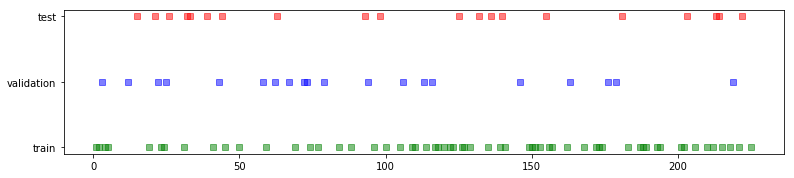

In [23]:
from random import shuffle

def split_shuffled(data,  train_valid_frac=np.array([0.6, 0.8]), shufflings_nbr=4):
    """ Splitting data using split points (defined as list of sorted indexes)."""
    d_idx = list(range(data.shape[0]))
    for _ in range(shufflings_nbr):
        shuffle(d_idx)       
    splitting_points = (len(data) * train_valid_frac).astype(int)
    splt_ = sorted(splitting_points)
    return [data.loc[d_idx[:splt_[0]]]] + [data.loc[d_idx[splt_[idx]: splt_[idx+1]]] for idx in range(len(splt_)-1)] + [data.loc[d_idx[splt_[(len(splt_)-1)]:]]]

plot(split_shuffled, df[:data_chunk_size])


## Splitting data

In [24]:
train_valid_frac=np.array([0.6, 0.8]) # defines a 60% train,20% validation  and 20% testing, splitting
train, valid, test = split_shuffled(df_dc, train_valid_frac=train_valid_frac)

# Training model(s) (framework) 

It covers regression and classification 
(the right/relative evaluation metric should be passed as param for the chosen model)

In [25]:
# Regression problem (mse evaluation)
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

metrics = {
        'mae' : mean_absolute_error,
        'mse': mean_squared_error,
        'acc': accuracy_score}


def visualize_prediction(model, data, target, fit_visu_subset=500):
    """ to Visualize how the prediction fits the target data"""
    plt.figure(figsize=(20,2))
    ax = plt.axes([0, 0, 1, 1])
    plt.plot(range(fit_visu_subset), target[:fit_visu_subset], label='validation (target)')
    plt.plot(range(fit_visu_subset), model.predict(data)[:fit_visu_subset], label='predicted validation (target)')
    plt.legend()
    plt.grid(True)
 
    
def train_model(train_valid_data, l_fts, model, eval_metric, target='y',
                visu=True, fit_visu_subset = 500, verbose=False):
    """ Train/validate model. """
    train, valid = train_valid_data
    
    # Train data
    X_train = train[l_fts].values
    y_train = train[target].values

    # Validation data
    X_valid = valid[l_fts].values
    y_valid = valid[target].values

    model.fit(X_train, y_train)
    m_train , m_valid = metrics[eval_metric](model.predict(X_train), y_train),\
                        metrics[eval_metric](model.predict(X_valid), y_valid)
 
    if verbose:
        print("train {0} : {1}, valid {0}: {2}".format(eval_metric, m_train, m_valid))

    if visu:
        visualize_prediction(model, X_valid, y_valid, fit_visu_subset=fit_visu_subset)
        
    return model, m_train, m_valid

In [26]:
def plot_train_valid_metric(train_valid_metric_):
    """ Plotting helper function for : plots train_mse = f(max_depth), valid_mse = max_depth 
    param input: array( [[max_depth, train mse or acc, valid mse or acc]])
    ex: array([[  1.        ,  15.51784612,  16.61064518],
       [  2.        ,  15.2618594 ,  16.40608675],
       [  3.        ,  15.0452693 ,  16.13797863],
       [  4.        ,  14.82284843,  15.96295279],
       [  5.        ,  14.51700337,  16.1122014 ] """
    plt.figure(figsize=(10,2))
    ax = plt.axes([0, 0, 1, 1])
    ax.set_xticks(train_valid_metric_[:, 0])
    plt.plot(train_valid_metric_[:, 0], train_valid_metric_[:, 1], label='train')
    plt.plot(train_valid_metric_[:, 0], train_valid_metric_[:, 2], label='validation')
    plt.legend()
    plt.grid(True)

# Experimenting models

## Linear regression

In [27]:
# Baseline 'mae' (predicting '1' the majority value (or class))
mean_absolute_error(np.ones(df.shape[0]), df['y'].values) 

3.0227847604854996

train mae : 2.8066833308970125, valid mae: 2.8678567546183023


/Users/wajih/anaconda/envs/relayr/lib/python3.6/site-packages/scipy/linalg/basic.py:1018: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 2.8066833308970125,
 2.8678567546183023)

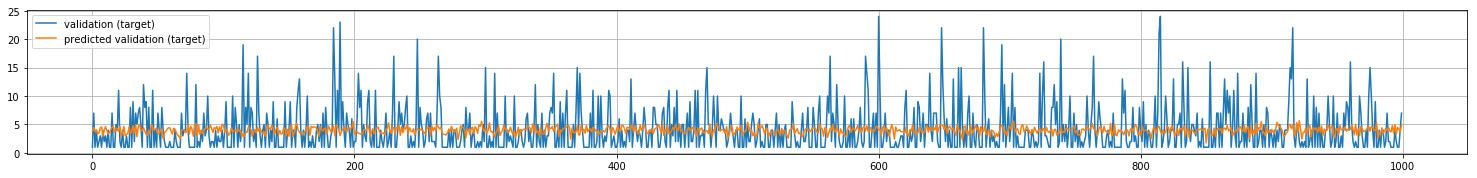

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge # linear regression with L2 regularization *(via alpha)
from sklearn.linear_model import Lasso

l_fts = numerical_fts
train_model([train, valid], l_fts,
            LinearRegression(), 'mae', verbose=True, fit_visu_subset=1000) 
# visualizing how the prediction is performing for the firts 1000 items of the validation set


train mae : 2.789874968673719, valid mae: 2.857400057164587


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 2.7898749686737192,
 2.857400057164587)

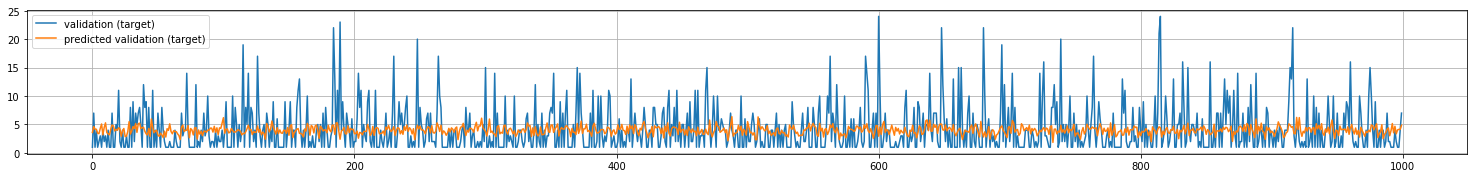

In [29]:
# adding more features
l_fts = numerical_fts + polynomial_fts # + sec_order_fts
train_model([train, valid], l_fts,
            LinearRegression(), 'mae', fit_visu_subset=1000, verbose=True)

train mae : 2.768059358709362, valid mae: 2.841320829614609


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 2.7680593587093618,
 2.8413208296146091)

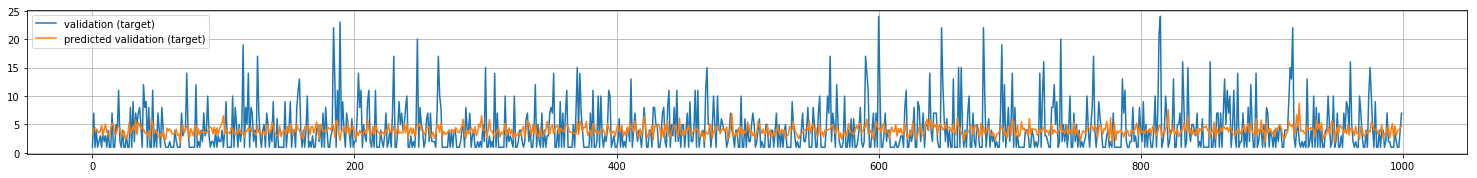

In [30]:
# again more features 
l_fts = numerical_fts + polynomial_fts + sec_order_fts
train_model([train, valid], l_fts,
            LinearRegression(), 'mae', fit_visu_subset=1000, verbose=True)

train mae : 2.683302384029982, valid mae: 2.751447538394554


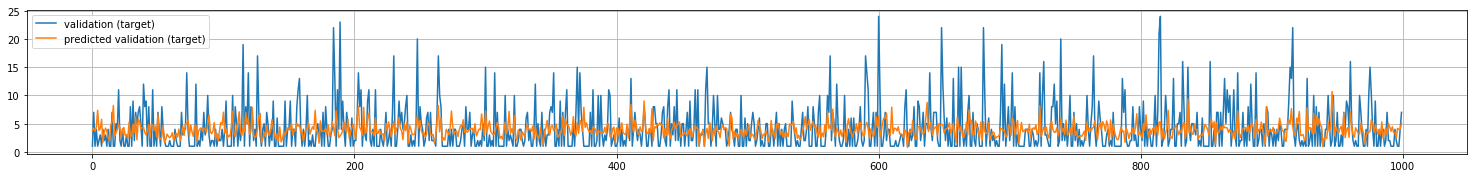

In [31]:
l_fts = scaled_num_fts + dummy_fts
m_scores = train_model([train, valid], l_fts,
            LinearRegression(), 'mae', fit_visu_subset=1000, verbose=True)


Getting better but nothing spectacular !

train mae : 2.700613603262044, valid mae: 2.7603562628773566
Features selection prop: 0.19597989949748743
Model coefficients (feature importance):
    T1_V8_C -> 2.7580126832828054
    T1_V12_C -> 1.9759496403670112
    T1_V7_C -> 0.8964770620694421
    T1_V1_12 -> -0.6887632140711936
    T1_V15_C -> 0.6668624834315365
    T1_V1_13 -> -0.6667399577914821
    T1_V1_14 -> -0.6148024879386571
    scaled_T1_V2_X_T2_V2 -> -0.47133010478925974
    scaled_T1_V2 -> 0.3775891709836135
    T1_V16_B -> -0.3709600245818274
    T1_V15_N -> -0.3224488478855661
    T1_V4_N -> 0.3139797474747989
    T1_V1_10 -> 0.29980251478900666
    T1_V1_15 -> -0.2886468317873984
    T1_V4_C -> -0.27989319283252007
    T1_V11_B -> -0.27820340984559433
    T1_V9_E -> 0.27333115902168886
    T1_V16_A -> -0.24129812818529237
    T2_V9_1 -> 0.23951011397813157
    T1_V11_A -> -0.23489444746962904


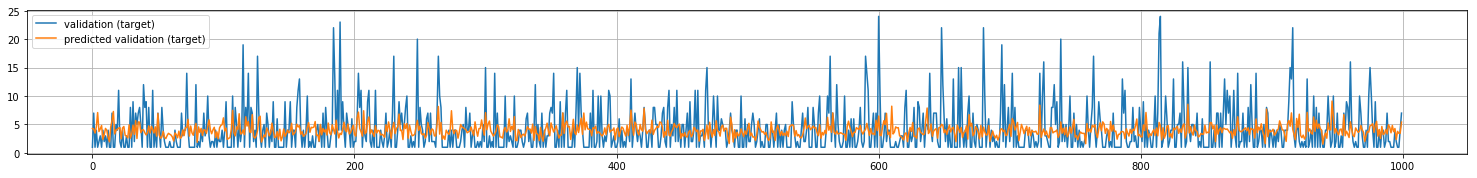

In [32]:
l_fts = scaled_num_fts + all_dummy_fts
m_scores = train_model([train, valid], l_fts,
            Lasso(alpha=0.01), 'mae', fit_visu_subset=1000, verbose=True)
# model coefficients
lasso_selected_fts = [ (coef, ft) for coef, ft in sorted(zip(m_scores[0].coef_, l_fts), key = lambda x:np.abs(x[0]), reverse=True) if coef]  
print("Features selection prop:", len(lasso_selected_fts)/float(len(l_fts)))
print ("Model coefficients (feature importance):")

for coef, ft in  lasso_selected_fts[:20]:
    if coef:
        print ("    {} -> {}".format(ft, coef))

## Decision Tree regression


The more we increase the complexity by increasing the max-depth, the model is clearly overfitting (performing better on the training data and getting poor on the validation set) with no good compromise (sweet-point) in between. 

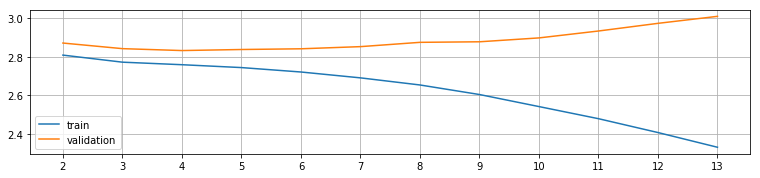

In [33]:
from sklearn.tree import DecisionTreeRegressor
max_depths = range(2, 14, 1)
l_fts =  scaled_num_fts + all_dummy_fts # dummy_fts + numerical_fts  + polynomial_fts  + sec_order_fts
models_mses = [ train_model([train, valid], l_fts, 
                        DecisionTreeRegressor(max_depth=max_depth), 'mae' ,visu=False) for max_depth in max_depths]
mses_ = np.array([[max_depth, mse_train, mse_valid] 
                  for max_depth, (_, mse_train, mse_valid) in zip(max_depths, models_mses)])

plot_train_valid_metric(mses_)

(DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'), 2.7215207014028353, 2.8436080496919125)

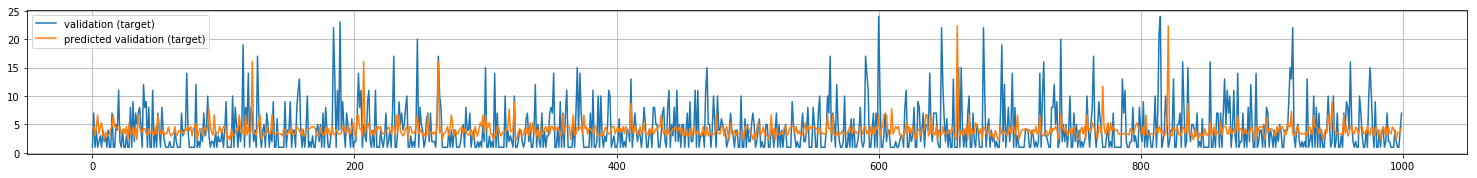

In [34]:
train_model([train, valid], l_fts,
            DecisionTreeRegressor(max_depth=6), 'mae', fit_visu_subset=1000)
# max_depth=5 (before the model starts overfitting) is porforming worse than the linear-regression 

## Random Forest Regression (this might take a bit of time)

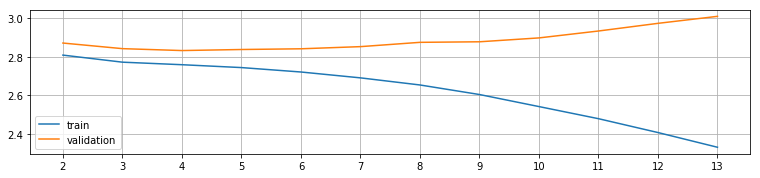

In [35]:
from sklearn.ensemble import BaggingRegressor
max_depths = range(2, 14, 1)
l_fts =  scaled_num_fts + all_dummy_fts # dummy_fts + numerical_fts  + polynomial_fts  + sec_order_fts
models_scores = [ train_model([train, valid], l_fts, 
                BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=max_depth),
                                 n_estimators=50, max_samples=0.5),
                                'mae', visu=False) for max_depth in max_depths ]
ms_ = np.array([[max_depth, m_train, m_valid] for max_depth, (_, m_train, m_valid) 
                in zip(max_depths, models_scores)])
plot_train_valid_metric(mses_)



(BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          bootstrap=True, bootstrap_features=False, max_features=1.0,
          max_samples=0.7, n_estimators=60, n_jobs=1, oob_score=False,
          random_state=None, verbose=0, warm_start=False),
 2.7020669445196202,
 2.806688218615859)

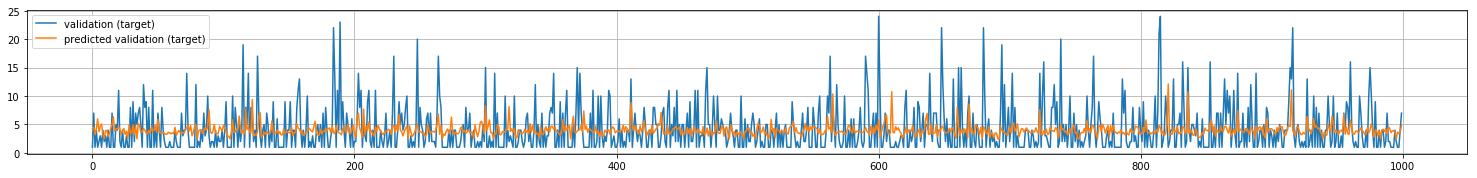

In [36]:
# max_depth=9 (before the model starts overfitting) is porforming worse than the linear-regression 
# let's use more estimators with a bit more depth (riskier depth)
train_model([train, valid], l_fts,
            BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                             n_estimators=60, max_samples=0.7), 'mae', fit_visu_subset=1000)


(BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          bootstrap=True, bootstrap_features=False, max_features=1.0,
          max_samples=0.7, n_estimators=60, n_jobs=1, oob_score=False,
          random_state=None, verbose=0, warm_start=False),
 2.0343510121535031,
 2.7509381818491478)

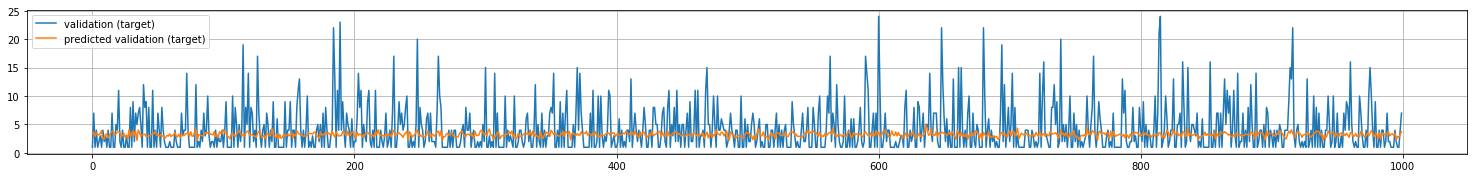

In [37]:
# A small test of biasing the model with prior knowledge about target distribution 
# forcing it to limit the prediction to val['y']<=10 
train_model([train[train['y']<=10], valid], l_fts,
            BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=6),
                             n_estimators=60, max_samples=0.7), 'mae', fit_visu_subset=1000)


# Trying Ordinal Regression with MORD

(OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001),
 2.658845060296088,
 2.7415686274509805)

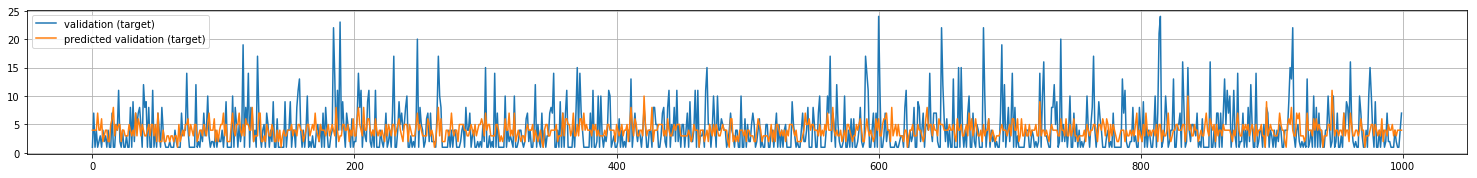

In [38]:
from mord import OrdinalRidge #, LogisticIT
train_model([train, valid], l_fts,
            OrdinalRidge(), 'mae', fit_visu_subset=1000, target='y')

(OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
        normalize=False, random_state=None, solver='auto', tol=0.001),
 1.995034617805441,
 2.6927450980392158)

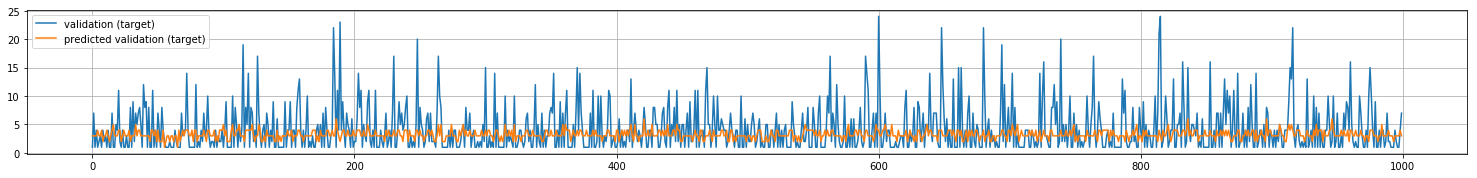

In [39]:
# A small test of biasing the model with prior knowledge about target distribution 
# forcing it to limit the prediction to val['y']<=10 
train_model([train[train['y']<=10], valid], l_fts,
            OrdinalRidge(), 'mae', fit_visu_subset=1000, target='y')

"Slightly" better than the linear regression, the mord has the best score for now !

## RandomForestClassifier ( partially ignoring the ordinal caracter of the target)

In [40]:
# trying to consider problem as a classification problem ignoring the Ordinal character of the target
from sklearn.ensemble import RandomForestClassifier
l_fts =  scaled_num_fts + all_dummy_fts # all_dummy_fts + numerical_fts + polynomial_fts + sec_order_fts
rfc_model_1 = train_model([train, valid], l_fts,
            RandomForestClassifier(max_depth = 8), 'acc', target = 'y', verbose=True, visu=False)
print (rfc_model_1)

train acc : 0.3807313964508644, valid acc: 0.37127450980392157
(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), 0.3807313964508644, 0.37127450980392157)


In [41]:
# which is clearly not better than the majority class classifier "1" 
sum((valid['y']==1).astype(int))/valid.shape[0]

0.37205882352941178

In [42]:
ys_fts = []
for y in range(1,5+1):
    ft = 'y_ft_{}'.format(y)
    df_dc[ft] = (df_dc['y'] == y).astype(int)
    ys_fts.append(ft)
    
# Defines a 60% train,20% validation  and 20% testing, splitting
train, valid, test = split_shuffled(df_dc, train_valid_frac=np.array([0.6, 0.8]))

train acc : 0.3789666328964999, valid acc: 0.3688235294117647
(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), 0.3789666328964999, 0.36882352941176472)
(OrdinalRidge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001), 2.6969181999411744, 2.6966666666666668)


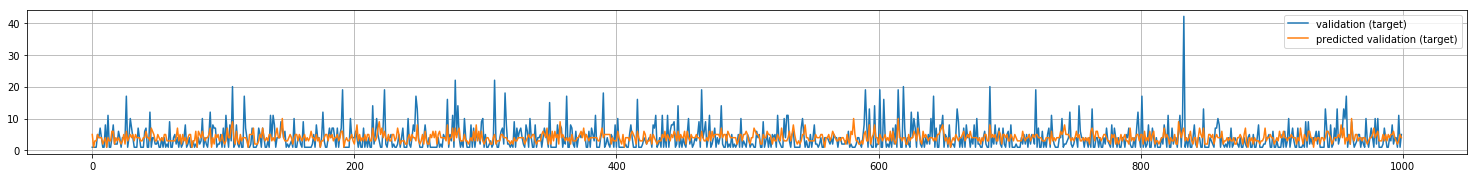

In [43]:
# since we resplit the data time for (small validation)
rfc_model_1 = train_model([train, valid], l_fts,
            RandomForestClassifier(max_depth = 8), 'acc', target = 'y', verbose=True, visu=False)
print (rfc_model_1)
print (train_model([train, valid], l_fts,
            OrdinalRidge(), 'mae', fit_visu_subset=1000, target='y'))

In [44]:
for target in ys_fts:
    print(target)
    model_scores = train_model([train, valid], l_fts,
            RandomForestClassifier(max_depth = 10), 'acc', target = target, visu=False, verbose=True)
    print (" a majority class classifier accuracy: ", sum((valid['y']!=int(target.split('_')[2])).astype(int))/valid.shape[0])

y_ft_1
train acc : 0.7131932416092029, valid acc: 0.6380392156862745
 a majority class classifier accuracy:  0.630392156863
y_ft_2
train acc : 0.8840158175103762, valid acc: 0.875
 a majority class classifier accuracy:  0.875196078431
y_ft_3
train acc : 0.9604235432530475, valid acc: 0.9595098039215686
 a majority class classifier accuracy:  0.959509803922
y_ft_4
train acc : 0.8384587731625216, valid acc: 0.8370588235294117
 a majority class classifier accuracy:  0.837156862745
y_ft_5
train acc : 0.929605542664793, valid acc: 0.9303921568627451
 a majority class classifier accuracy:  0.930490196078


In [45]:
# Trying to relaxing the problem Generating buckets (range based classes)
# to see how much of the ranges are predictable the unbalanced classes (still making it )

bucket_fts = []
for b_size in range(20, 8, -1): # ranges (bucket or bin) size 
    b_ft = 'cls_{}'.format(b_size)
    df_dc[b_ft] = df_dc['y']//b_size
    bucket_fts.append(b_ft)
    
# (resplitting) Defines a 60% train,20% validation  and 20% testing, splitting
# we can avoid this by generating the features for all of the dataframes but 
# it is not harmful to do the shuffle (and see if is confirming/bracking the previous conclusions)
train, valid, test = split_shuffled(df_dc, train_valid_frac=np.array([0.6, 0.8]))

In [46]:
enough_good_fts = []
l_fts =  dummy_fts + numerical_fts + polynomial_fts
for target in bucket_fts:
    print("------------\nPredicting : {}".format(target))
    model_scores = train_model([train, valid], l_fts,
            RandomForestClassifier(max_depth = 15), 'acc', target = target, visu=False, verbose=True)
    
    valid.loc[:, 'predicted_'+target] = model_scores[0].predict(valid[l_fts].values)
    train.loc[:, 'predicted_'+target] = train[target].values
    maj_class_classifier_acc = sum((valid['y']<int(target.split('_')[1])).astype(int))/valid.shape[0]
    print ("a  majority class accuracy !!! ", maj_class_classifier_acc)
    
    print ("feature importance:")
    for ft, importance in sorted(zip(l_fts, model_scores[0].feature_importances_),
                             key=lambda x:x[1], reverse=True)[:5]:
        print(ft, importance)
    
    # l_fts.append('predicted_'+target)
    if model_scores[2]>maj_class_classifier_acc:
        enough_good_fts.append('predicted_'+target)

------------
Predicting : cls_20
train acc : 0.9960783032125233, valid acc: 0.9924509803921568
a  majority class accuracy !!!  0.992549019608
feature importance:
T2_V1_^3 0.0308463702171
T1_V8_C 0.0295175351055
T2_V2_^5 0.026863893735
T2_V1_^4 0.0253805776268
T1_V2_^5 0.0250534305189
------------
Predicting : cls_19
train acc : 0.995195921435341, valid acc: 0.99
a  majority class accuracy !!!  0.990196078431
feature importance:
T2_V1_^3 0.0327603106908
T1_V8_C 0.0296675570362
T2_V1 0.0291582228771
T1_V2_^3 0.0267284494748
T2_V1_^5 0.0263625678038
------------
Predicting : cls_18
train acc : 0.9931697114284781, valid acc: 0.9886274509803922
a  majority class accuracy !!!  0.98862745098
feature importance:
T2_V1_^5 0.0295783758511
T2_V1_^3 0.0284079409907
T2_V1_^4 0.0278952935765
T2_V1 0.0254326196415
T2_V2 0.0232756821863
------------
Predicting : cls_17
train acc : 0.9899343115788097, valid acc: 0.985
a  majority class accuracy !!!  0.985
feature importance:
T2_V1_^3 0.0338628767251
T2

Clearly needs more features (more work on the features engineering)
the prediction power of these features is not outperforming the majority class classifier


In [47]:
from  sklearn.ensemble import GradientBoostingClassifier

enough_good_fts = []
l_fts =  all_dummy_fts + numerical_fts
for target in bucket_fts:
    print("------------\nPredicting : {}".format(target))
    model_scores = train_model([train, valid], l_fts,
            GradientBoostingClassifier(max_depth = 5, n_estimators=10), 'acc', target = target, visu=False, verbose=True)
    
    valid.loc[:, 'predicted_'+target] = model_scores[0].predict(valid[l_fts].values)
    train.loc[:, 'predicted_'+target] = train[target].values
    maj_class_classifier_acc = sum((valid['y']<int(target.split('_')[1])).astype(int))/valid.shape[0]
    print ("a  majority class accuracy !!! ", maj_class_classifier_acc)
    
    print ("feature importance:")
    for ft, importance in sorted(zip(l_fts, model_scores[0].feature_importances_),
                             key=lambda x:x[1], reverse=True)[:5]:
        print(ft, importance)
    
    # l_fts.append('predicted_'+target)
    if model_scores[2]>maj_class_classifier_acc:
        enough_good_fts.append('predicted_'+target)

------------
Predicting : cls_20
train acc : 0.9916990751331742, valid acc: 0.9924509803921568
a  majority class accuracy !!!  0.992549019608
feature importance:
T1_V8_C 0.0955250205953
T2_V15_10 0.0427908623615
T2_V1 0.0391375581455
T2_V7_40 0.0389367371964
T2_V1_57 0.0375617809531
------------
Predicting : cls_19
train acc : 0.9888558449622536, valid acc: 0.9901960784313726
a  majority class accuracy !!!  0.990196078431
feature importance:
T1_V8_C 0.0982373203847
T1_V12_C 0.0398368074787
T2_V1_57 0.0368082702365
T1_V1 0.0339721892545
T1_V16_N 0.0332364076066
------------
Predicting : cls_18
train acc : 0.9868296349553907, valid acc: 0.9886274509803922
a  majority class accuracy !!!  0.98862745098
feature importance:
T1_V8_C 0.100660156276
T2_V15 0.0473292874188
T1_V12_C 0.0391007162894
T2_V7 0.0340189232964
T2_V1_57 0.0296636943613
------------
Predicting : cls_17
train acc : 0.9830059805876009, valid acc: 0.985
a  majority class accuracy !!!  0.985
feature importance:
T1_V8_C 0.1172

## time for XGBoost

In [48]:
from xgboost import XGBClassifier
l_fts =  scaled_num_fts + all_dummy_fts # all_dummy_fts + numerical_fts  + polynomial_fts + sec_order_fts

# Trying to predict y==1 class vs all 
# Comparing Randomforest classifier to XGBoost

print(train_model([train, valid], scaled_num_fts + all_dummy_fts,
            XGBClassifier(silent=False, n_estimators=40, max_depth=8),
                  'acc', target='y_ft_1', visu=False, verbose=True))
print(train_model([train, valid], l_fts,
                  RandomForestClassifier(max_depth = 8),
                  'acc', target='y_ft_1', visu=False, verbose=True))


train acc : 0.7498937873786725, valid acc: 0.652156862745098
(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=8, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=False, subsample=1), 0.74989378737867252, 0.65215686274509799)
train acc : 0.6750547403509919, valid acc: 0.6464705882352941
(RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False), 0.67505474035099189, 0.64647058823529413)


In [49]:
# XGBoost tuning  .... (to be continued)

In [50]:
# Clearly the toy (problem is not that easy) :) needs more time to think/play with the data
# playing a bit more with XGBoost and MORD...
# Going from buckets (multiclass) to more binary (either generating dummies out of the buckets/(or multiple one-vs-one)/ (cluster vs cluster)
# trying to find some clearly better condition than the majority clssifier.
# I hope that the notebook shows some insights about (me)
